# core

> random geometric graph class

In [ ]:
#| hide
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import functools
import seaborn.objects as so

In [ ]:
#| export
class RGG:
    """random geometric graph"""
    def __init__(self,n:int,r:float):
        self.n = n
        self.r = r
        self.points = np.random.default_rng().random((n,2))
    
    @functools.cached_property
    def distances(self):
        return np.array([np.sqrt(np.sum((x- self.points)**2, axis=1)) for x in self.points])

    @functools.cached_property
    def adj(self):
        mask = self.distances < self.r
        return {i: [j for j,v in enumerate(row) if v and j != i] for i,row in enumerate(mask)}

In [ ]:
rgg = RGG(20,0.5)

In [ ]:
rgg.adj

{0: [2, 4, 8, 12, 13, 14, 19],
 1: [2, 6, 8, 11, 14, 15, 16, 17, 19],
 2: [0, 1, 3, 5, 7, 8, 10, 11, 12, 14, 15, 16, 17, 18, 19],
 3: [2, 5, 7, 10, 14, 15, 17, 18],
 4: [0, 8, 12, 13, 19],
 5: [2, 3, 7, 10, 11, 14, 15, 16, 17, 18],
 6: [1, 9, 11, 16],
 7: [2, 3, 5, 9, 10, 11, 14, 15, 16, 17, 18],
 8: [0, 1, 2, 4, 12, 13, 14, 18, 19],
 9: [6, 7, 11, 15, 16, 17],
 10: [2, 3, 5, 7, 14, 15, 17, 18],
 11: [1, 2, 5, 6, 7, 9, 14, 15, 16, 17, 18, 19],
 12: [0, 2, 4, 8, 13, 14, 19],
 13: [0, 4, 8, 12, 14, 19],
 14: [0, 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19],
 15: [1, 2, 3, 5, 7, 9, 10, 11, 14, 16, 17, 18, 19],
 16: [1, 2, 5, 6, 7, 9, 11, 14, 15, 17, 18, 19],
 17: [1, 2, 3, 5, 7, 9, 10, 11, 14, 15, 16, 18, 19],
 18: [2, 3, 5, 7, 8, 10, 11, 14, 15, 16, 17, 19],
 19: [0, 1, 2, 4, 8, 11, 12, 13, 14, 15, 16, 17, 18]}

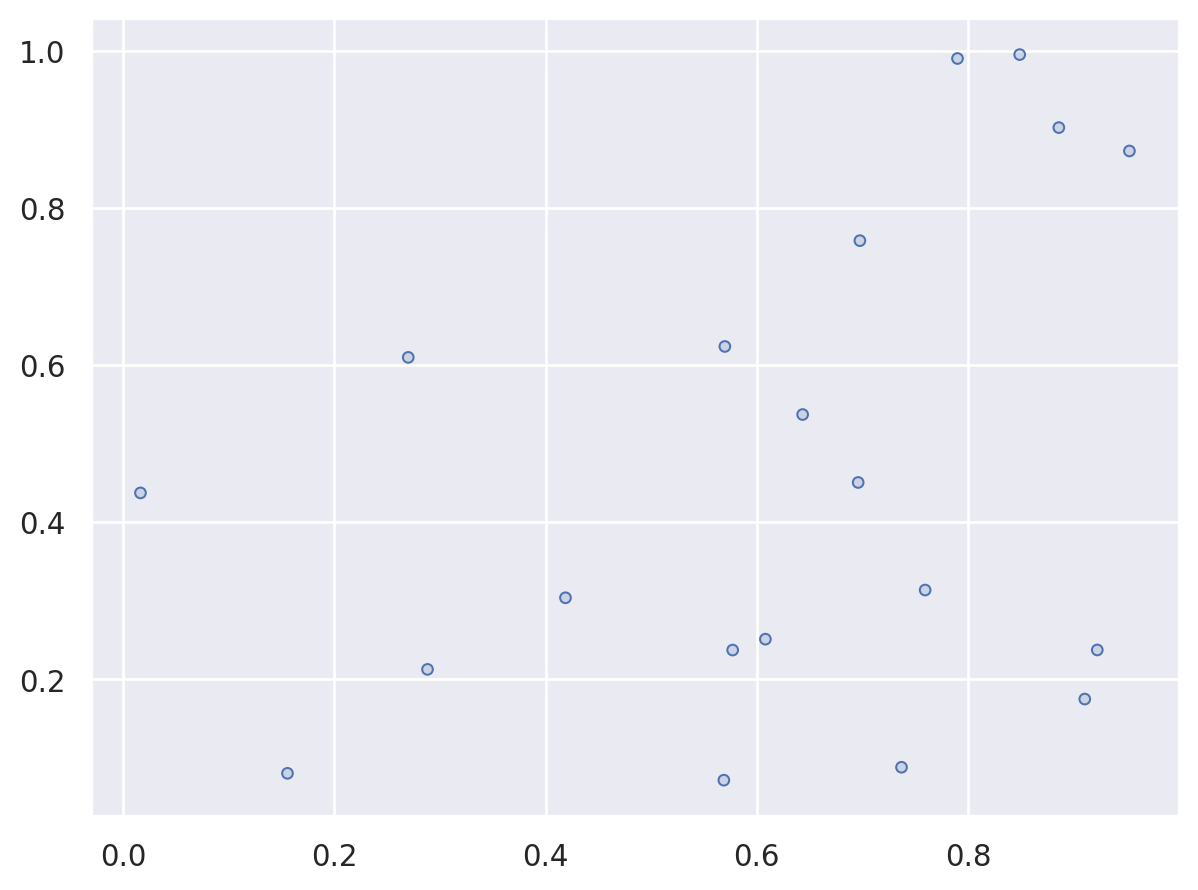

In [ ]:
p = so.Plot(x=rgg.points[:,0], y=rgg.points[:,1])
p.add(so.Dots())

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()